# Student Grade Prediction Model

## Authors:
- Samuel Nicklaus
- Jacob Kindle
- Lane Swartzendruber
- Alejandro Mirafuentes

# Introduction

In this project, our team focuses on predicting a student's academic performance based on various personal, academic, and social factors using **classification**. We aim to classify students into different grade categories (A, B, C, etc.) based on inputs such as age, sex, high school type, participation in extracurricular activities, and more.

*Data Source*: [Here](https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset?select=student.csv)

*Data Source Description (Via Kaggle):*

This dataset encompasses various aspects related to student performance. Each entry is uniquely identified by an 'Id'. The dataset includes demographic information such as 'Student_Age' and 'Sex'. 'High_School_Type' categorizes the type of high school attended, while 'Scholarship' indicates whether the student has a scholarship. Details about 'Additional_Work' and involvement in 'Sports_activity' provide insights into extracurricular commitments.

'Transportation' outlines the mode of commuting for each student. Academic aspects are captured through 'Weekly_Study_Hours', 'Attendance', and evaluations of 'Reading', 'Notes', and 'Listening_in_Class'. The culmination of these factors is reflected in the 'Grade' column, providing a comprehensive overview of student performance. This dataset serves as a valuable resource for exploring the multifaceted dynamics influencing academic outcomes.


In [42]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     naive_bayes,
                     model_selection as skms,
                     linear_model, dummy,
                     metrics,
                     pipeline,
                     preprocessing as skpre)
import ipywidgets as widgets
from ipywidgets import interact

# Data Description

- Student_Age: The age of the student.


- Sex: The gender of the student (e.g., Male, Female).


- High_School_Type: The type of high school the student attended (e.g., State, Private, Other).


- Scholarship: Information on whether the student received a scholarship (e.g., percentages indicating the scholarship amount).


- Additional_Work: Indicates whether the student has additional work or responsibilities outside of school (Yes/No).


- Sports_activity: Indicates whether the student participates in sports activities (Yes/No).


- Transportation: The mode of transportation used by the student to get to school (e.g., Bus, Private).


- Weekly_Study_Hours: The number of hours the student spends studying each week.


- Attendance: The regularity of the student's attendance (e.g., Always, Never).


- Reading: Indicates whether the student engages in reading activities outside of the required curriculum (Yes/No).


- Notes: Indicates whether the student takes notes during classes or while studying (Yes/No).


- Listening_in_Class: Indicates whether the student actively listens in class (Yes/No).


- Project_work: Indicates whether the student participates in project work (Yes/No).


- Grade: The grade the student received, which could be in a variety of formats (e.g., AA, BB, etc).

In [43]:
# Read in data, drop unneeded columns
df = pd.read_csv('student.csv')
df.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

# Use one-hot encoding for categorical variables
categorical_vars = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

one_hot_encoder = skpre.OneHotEncoder(sparse_output=False)
encoded_vars = one_hot_encoder.fit_transform(df[categorical_vars])
encoded_vars_df = pd.DataFrame(encoded_vars, columns=one_hot_encoder.get_feature_names_out(categorical_vars))

# Drop original categorical variables and some columns that are not needed
df.drop(categorical_vars, axis=1, inplace=True)
encoded_vars_df.drop(['Attendance_3','Notes_6','Listening_in_Class_6','Scholarship_nan'], axis=1, inplace=True)
df_encoded = pd.concat([df, encoded_vars_df], axis=1)


# Split data
X = df_encoded.drop('Grade', axis=1)  # Features
y = df_encoded['Grade']  # Target variable

X_temp, X_test, y_temp, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_validation, y_train, y_validation = skms.train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# Results in 60% train, 20% validation, 20% test sets

# Print columns and final dataframe
print(df_encoded.columns)
df_encoded.head()


Index(['Student_Age', 'Weekly_Study_Hours', 'Grade', 'Sex_Female', 'Sex_Male',
       'High_School_Type_Other', 'High_School_Type_Private',
       'High_School_Type_State', 'Scholarship_100%', 'Scholarship_25%',
       'Scholarship_50%', 'Scholarship_75%', 'Additional_Work_No',
       'Additional_Work_Yes', 'Sports_activity_No', 'Sports_activity_Yes',
       'Transportation_Bus', 'Transportation_Private', 'Attendance_Always',
       'Attendance_Never', 'Attendance_Sometimes', 'Reading_No', 'Reading_Yes',
       'Notes_No', 'Notes_Yes', 'Listening_in_Class_No',
       'Listening_in_Class_Yes', 'Project_work_No', 'Project_work_Yes'],
      dtype='object')


,Student_Age,Weekly_Study_Hours,Grade,Sex_Female,Sex_Male,High_School_Type_Other,High_School_Type_Private,High_School_Type_State,Scholarship_100%,Scholarship_25%,...,Attendance_Never,Attendance_Sometimes,Reading_No,Reading_Yes,Notes_No,Notes_Yes,Listening_in_Class_No,Listening_in_Class_Yes,Project_work_No,Project_work_Yes
0,21,0,AA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,20,0,AA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,21,2,AA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,18,2,AA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,22,12,AA,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


# Data Visualization

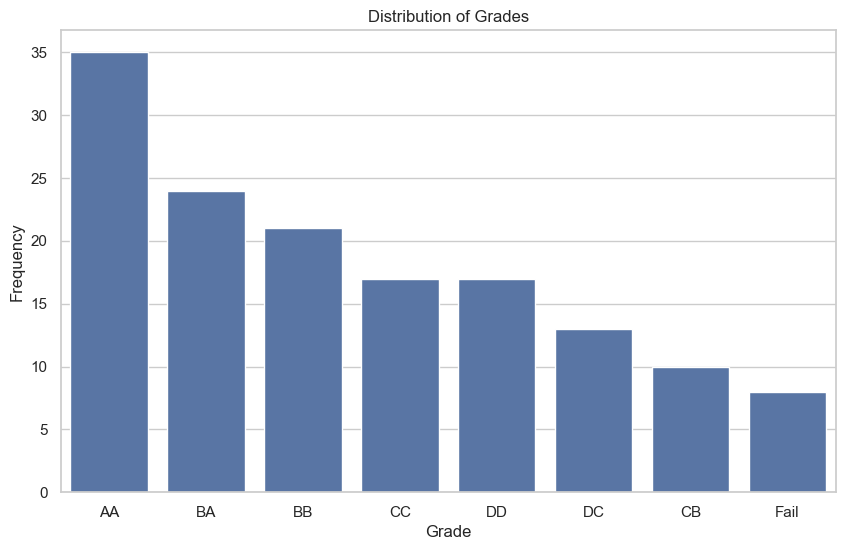

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()
df_for_heatmap = df.copy()
df_for_heatmap['Grade'] = df_for_heatmap['Grade']



# Training/validation

In [47]:
from itertools import combinations
best_score = 0
best_model = None
best_features = None
models = [
    {"name": "KNN-n=3", "model": neighbors.KNeighborsClassifier(n_neighbors=3)},
    {"name": "KNN-n=5", "model": neighbors.KNeighborsClassifier(n_neighbors=5)},
    {"name": "KNN-n=7", "model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    {"name": "KNN-n=9", "model": neighbors.KNeighborsClassifier(n_neighbors=9)},
    {"name": "GaussianNB", "model": naive_bayes.GaussianNB()},
]
# Iterating through each model
for model in models:
    # Trying every combination of features, from 1 feature to all features
    feature_names = X.columns
    for L in range(1, len(feature_names) + 1):
        for subset in combinations(feature_names, L):
            # Selecting the subset of features
            X_train_sub = X_train[list(subset)]
            X_validation_sub = X_validation[list(subset)]
                
            # Fitting the model
            fit = model['model'].fit(X_train_sub, y_train)
            predictions = fit.predict(X_validation_sub)
            score = metrics.accuracy_score(y_validation, predictions)
            print(score)
                
            # Updating the best score and best model if this model is better
            if score > best_score:
                 best_score = score
                 best_model = model['name']
                 best_features = subset
    
    print(f"Best Model: {best_model}\nBest Score: {best_score}\nBest Features: {best_features}")

0.13793103448275862
0.27586206896551724
0.13793103448275862
0.13793103448275862
0.2413793103448276
0.2413793103448276
0.2413793103448276
0.1724137931034483
0.2413793103448276
0.10344827586206896
0.3103448275862069
0.2413793103448276
0.20689655172413793
0.27586206896551724
0.2413793103448276
0.2413793103448276
0.3103448275862069
0.10344827586206896
0.2413793103448276
0.2413793103448276
0.2413793103448276
0.20689655172413793
0.20689655172413793
0.10344827586206896
0.2413793103448276
0.2413793103448276
0.2413793103448276
0.1724137931034483
0.1724137931034483
0.13793103448275862
0.13793103448275862
0.13793103448275862
0.1724137931034483
0.1724137931034483
0.20689655172413793
0.13793103448275862
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.20689655172413793
0.20689655172413793
0.13793103448275862
0.13793103448275862
0.20689655172413793
0.10344827586206896
0.10344827586206896
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.172413

KeyboardInterrupt: 